# Credit Card Fault Detection Using PyCaret

In [2]:
#importing necessary libraries for the analysis
import pandas as pd
import numpy as np

In [3]:
#loading the data
credit_card= pd.read_csv('C:/Users/User/Desktop/Capstone/creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#shape which gives total rows and columns in the dataset

credit_card.shape

(284807, 31)

In [5]:
#Class column has two values '0'(non-fradulent) and '1'(fradulent)
#total number of rows having 0 as class value
len(credit_card[credit_card['Class']==0])

284315

In [6]:
#total number of rows having 1 as class value
len(credit_card[credit_card['Class']==1])

492

In [7]:
#284315 entries for class=0 and
#492 entires for class=1.
# We can clearly see that the data is imbalance.
# we will use pycaret library for solving this classfication problem.

#install pycaret

In [9]:
!pip install pycaret

  Using cached https://files.pythonhosted.org/packages/6d/6f/c67eed763bcc095d9187c7a04fdc3ba640d1e990368acfcb1d294ff71549/typed_ast-1.4.1-cp37-cp37m-win_amd64.whl
  Found existing installation: importlib-metadata 0.17
    Uninstalling importlib-metadata-0.17:
      Successfully uninstalled importlib-metadata-0.17


ERROR: phik 0.9.10 has requirement joblib>=0.14.1, but you'll have joblib 0.13.2 which is incompatible.


In [10]:
#import module and intializing setup
from pycaret.classification import *

clf = setup(data = credit_card, target = 'Class')

#during the setup it will ask if all the variables are as per the dataset, as per your needs. 
#Type y and enter.
#It will also ask you % of data to be kept for training model.
# Here we have spit the data 70/30

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8335
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [21]:
# we will get Accuracy, Recall, Preccision, F1-score..... for different models.

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.9996,0.973,0.801,0.9475,0.866,0.8658
1,Random Forest Classifier,0.9995,0.9271,0.7552,0.9406,0.835,0.8348
2,Extra Trees Classifier,0.9995,0.9547,0.78,0.9458,0.8526,0.8524
3,Extreme Gradient Boosting,0.9995,0.9749,0.8008,0.9181,0.8535,0.8532
4,Linear Discriminant Analysis,0.9994,0.9822,0.7675,0.8787,0.816,0.8158
5,Ada Boost Classifier,0.9992,0.9635,0.7093,0.8195,0.7551,0.7547
6,Logistic Regression,0.9991,0.9116,0.7052,0.7555,0.7266,0.7262
7,Decision Tree Classifier,0.9991,0.892,0.7845,0.7334,0.7561,0.7557
8,Gradient Boosting Classifier,0.999,0.7003,0.5433,0.8143,0.6402,0.6397
9,Ridge Classifier,0.9988,0,0.4067,0.8377,0.5428,0.5423


In [12]:
# since it shows CatBoost is giving us highest accuracy let us deep dive into it and create a model.
catboost= create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9996,0.9696,0.8750,0.9130,0.8936,0.8934
1,0.9993,0.9836,0.6250,0.9375,0.7500,0.7497
2,0.9995,0.9772,0.8333,0.8696,0.8511,0.8508
3,0.9998,0.9993,0.8800,1.0000,0.9362,0.9361
4,0.9996,0.9681,0.8333,0.9091,0.8696,0.8694
5,0.9996,0.9806,0.7917,0.9500,0.8636,0.8634
6,0.9996,0.9008,0.7500,1.0000,0.8571,0.8569
7,0.9994,0.9927,0.6667,1.0000,0.8000,0.7997
8,0.9996,0.9609,0.8333,0.9524,0.8889,0.8887
9,0.9997,0.9668,0.8750,0.9545,0.9130,0.9129


In [24]:
#Let us implement hyperpyrameter tuning to tune the model.
tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9996,0.9861,0.7917,0.9500,0.8636,0.8634
1,0.9996,0.9514,0.7917,0.9500,0.8636,0.8634
2,0.9998,0.9998,0.9583,0.9200,0.9388,0.9387
3,0.9996,0.9546,0.8000,0.9524,0.8696,0.8694
4,0.9998,0.9667,0.9167,0.9565,0.9362,0.9361
5,0.9995,0.9663,0.7917,0.9048,0.8444,0.8442
6,0.9995,0.9897,0.7083,1.0000,0.8293,0.8290
7,0.9995,0.9895,0.7083,1.0000,0.8293,0.8290
8,0.9998,0.9989,0.9167,0.9565,0.9362,0.9361
9,0.9995,0.9422,0.7500,0.9474,0.8372,0.8370


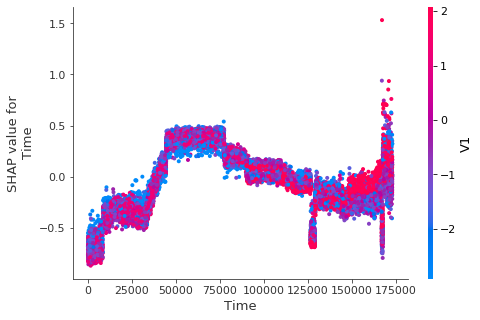

In [13]:
interpret_model(catboost, plot='correlation')

In [39]:
#Let us predict our values using the predict_model()
catboost_pred = predict_model(catboost)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.9996,0.9758,0.7864,0.9878,0.8757,0.8755


In [14]:
#Let us create another model xgboost as I want to show the evluate_model() below.

xgboost=create_model('xgboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9996,0.9780,0.8333,0.9091,0.8696,0.8694
1,0.9992,0.9828,0.6250,0.8824,0.7317,0.7313
2,0.9993,0.9858,0.7500,0.8182,0.7826,0.7823
3,0.9995,0.9936,0.8400,0.8750,0.8571,0.8569
4,0.9996,0.9921,0.8333,0.9091,0.8696,0.8694
5,0.9994,0.9532,0.7500,0.8571,0.8000,0.7997
6,0.9995,0.9823,0.7083,1.0000,0.8293,0.8290
7,0.9994,0.9670,0.7083,0.9444,0.8095,0.8092
8,0.9996,0.9531,0.8333,0.9091,0.8696,0.8694
9,0.9998,0.9670,0.9167,0.9565,0.9362,0.9361


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

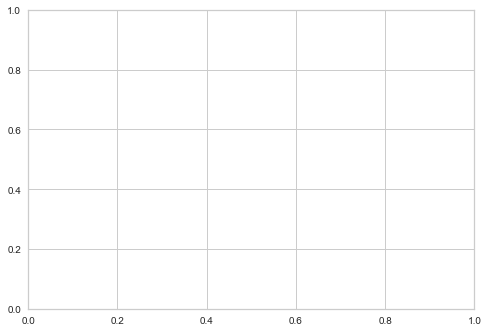

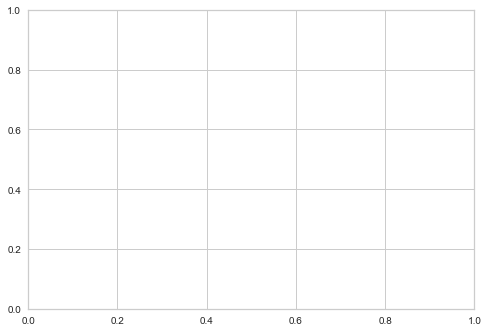

In [16]:
# It shows all evaluation metrics. Select each of them to explore in detail.

evaluate_model(xgboost)